# Assignment for Week 8

## Final Project     

Week's 8 assignment will be work towards the final project.    

### About Final Project     


The final project will be a competition submission to any of the platforms available such as Kaggle. The competition will require to either build a Linear Regression or Logistic Regression model. 

The instructor will notify students by week 7 on the competition and the submissions.  This competition will include some or all the material and skills learned in the course.

Students are required to submit the final version of work/codes as a Jupyter Notebook via colab as submitted to the competition along with the link to their account pointing to their score on the competition's board. This will be evaluated and graded for the entire project for the duration of week 8-12. 



## Tasks

**Required:**    

*   Open an account to the decided competition's platform and download the data sets (train, test, etc) needed to compete.    
*   Start working with your data, get to know the data. Read all the competition information provided to the hosting platform. Try to get familiar with the data, topic, etc.      
*   Submit the link of your competition's account via BlueQuill. 

**Pump-it Up Water Project - Tanzanian Ministry of Water**

Competition Challenge - using data from "Taarifa" and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition.

Predict one of these three classes based on several variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which water points will fail can improve maintenance operaations and ensure that clean, potable water is available to communities across Tanzania.

A training dataset with information of nearly sixty thousand water points across Tanzania is provided its use is expected to build a model that will be able to predict which water points are functional, nonfunctional, and functional but need repair on a test dataset.

In [1]:
# Let's load pandas and see the first few rows of data of the Pump-it Up dataset.
import pandas as pd
import os
import sys
water = pd.read_csv('https://raw.githubusercontent.com/bradley1958/DATA612_FINAL_PROJECT/master/Well_Water_19K_Mod.csv')
water.head(5)



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_name,source_type_name,quality_group_name
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,1,vwc,user-group,pay annually,annually,soft,1,1,enough,spring,1,groundwater,1,communal standpipe,1,functional,spring,good
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,1,wug,user-group,never pay,never pay,soft,1,2,insufficient,rainwater harvesting,2,surface,1,communal standpipe,1,functional,rainwater harvesting,good
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,1,vwc,user-group,pay per bucket,per bucket,soft,1,1,enough,dam,3,surface,4,communal standpipe,1,functional,dam,good
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,5,vwc,user-group,never pay,never pay,soft,1,0,dry,machine dbh,4,groundwater,4,communal standpipe,0,non functional,borehole,good
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,1,other,other,never pay,never pay,soft,1,3,seasonal,rainwater harvesting,2,surface,1,communal standpipe,1,functional,rainwater harvesting,good


In [2]:
# Let's load additional pandas features
import time
import seaborn as sns
import warnings
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.image as mpimg
import numpy as np
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals.six import StringIO
from sklearn import tree
import scipy.stats as stats
from pandas import set_option
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier
from datetime import datetime





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
# Let's see our Dtype information
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

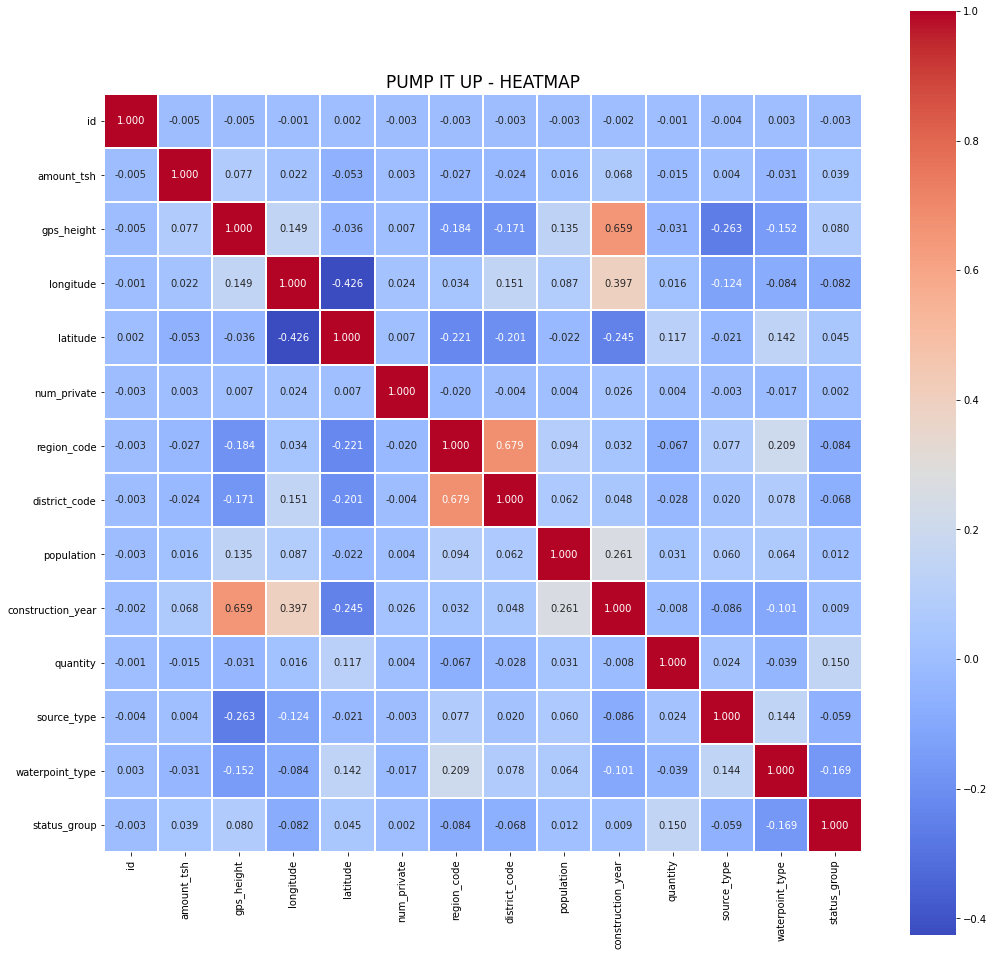

In [4]:
# Let's do a Correlation Matrix 
corr = water.corr()
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(corr, square=True, cbar=True, annot=True, fmt='.3f',
            xticklabels=True, yticklabels=True, 
            cmap="coolwarm", linewidth=1, ax=ax)
plt.title('PUMP IT UP - HEATMAP', size=17);



In [5]:
# Let's create a count of Status Group values by Waterpoint Type with a Bar Chart
water_type = water.groupby('waterpoint_type_group')[['status_group']].count()
print(water_type)



                       status_group
waterpoint_type_group              
cattle trough                   116
communal standpipe            34625
dam                               7
hand pump                     17488
improved spring                 784
other                          6380


In [6]:
# Let's see the Numeric Coding for the Waterpoint Type
water_type = water.groupby('waterpoint_type')[['status_group']].count()
print(water_type)

                 status_group
waterpoint_type              
0                         116
1                       28522
2                       17488
3                        6380
4                        6103
5                         784
7                           7


In [ ]:
# Let's see the above sum of the Waterpoint Type
water_type = water.groupby('waterpoint_type_group')[['status_group']].count().sum()
print(water_type)

status_group    59400
dtype: int64


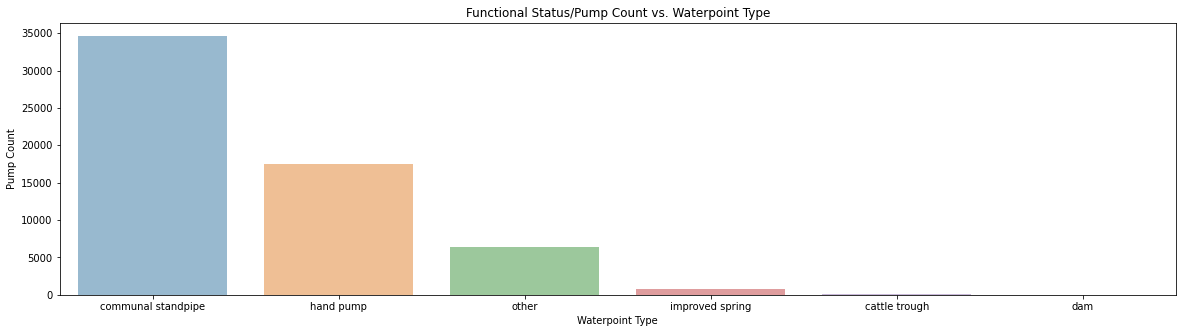

In [7]:
pump_count = water['waterpoint_type_group'].value_counts()
pump_count = pump_count[:7,]
plt.figure(figsize=(20,5))
sns.barplot(pump_count.index, pump_count.values, alpha=0.5)
plt.title('Functional Status/Pump Count vs. Waterpoint Type')
plt.ylabel('Pump Count')
plt.xlabel('Waterpoint Type')
plt.show()

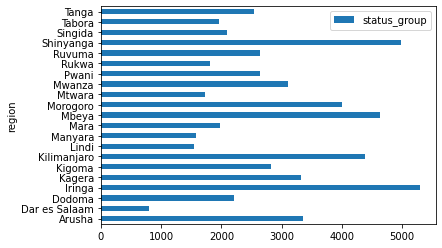

In [8]:
# Let's create a count of Status Group values by Region with a Bar Chart
region = water.groupby('region')[['status_group']].count()
region.plot(kind='barh')


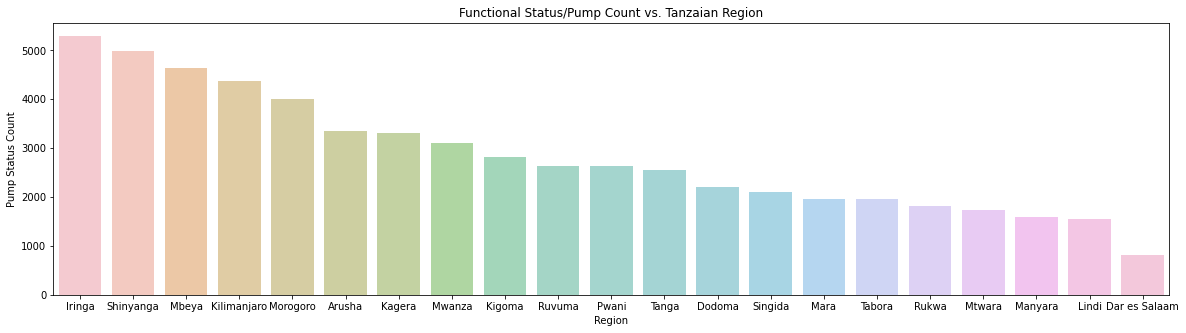

In [9]:
region_count = water['region'].value_counts()
region_count = region_count[:21,]
plt.figure(figsize=(20,5))
sns.barplot(region_count.index, region_count.values, alpha=0.5)
plt.title('Functional Status/Pump Count vs. Tanzaian Region')
plt.ylabel('Pump Status Count')
plt.xlabel('Region')
plt.show()





In [10]:
# Let's reverse the above chart to look at functional well status in the region
region = water.groupby('region')[['status_group_name']].count()
print(region)


               status_group_name
region                          
Arusha                      3350
Dar es Salaam                805
Dodoma                      2201
Iringa                      5294
Kagera                      3316
Kigoma                      2816
Kilimanjaro                 4379
Lindi                       1546
Manyara                     1583
Mara                        1969
Mbeya                       4639
Morogoro                    4006
Mtwara                      1730
Mwanza                      3102
Pwani                       2635
Rukwa                       1808
Ruvuma                      2640
Shinyanga                   4982
Singida                     2093
Tabora                      1959
Tanga                       2547


In [11]:
# Let's try and convert our Column "date_recorded" to a pandas "datatime" column called "Date"
water['Date'] = pd.to_datetime(water['date_recorded'], format='%m/%d/%Y')
water.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_name,source_type_name,quality_group_name,Date
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,1,vwc,user-group,pay annually,annually,soft,1,1,enough,spring,1,groundwater,1,communal standpipe,1,functional,spring,good,2011-03-14
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,1,wug,user-group,never pay,never pay,soft,1,2,insufficient,rainwater harvesting,2,surface,1,communal standpipe,1,functional,rainwater harvesting,good,2013-03-06
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,1,vwc,user-group,pay per bucket,per bucket,soft,1,1,enough,dam,3,surface,4,communal standpipe,1,functional,dam,good,2013-02-25
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,5,vwc,user-group,never pay,never pay,soft,1,0,dry,machine dbh,4,groundwater,4,communal standpipe,0,non functional,borehole,good,2013-01-28
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,1,other,other,never pay,never pay,soft,1,3,seasonal,rainwater harvesting,2,surface,1,communal standpipe,1,functional,rainwater harvesting,good,2011-07-13


In [12]:
# Let's see Dtypes again
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  object        
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [13]:
# Let's try and replace our zero's in the Construction Year Column with the "median value" for that Column
print(water['construction_year'].median())


1986.0


In [14]:
water['construction_year'] = water['construction_year'].replace(0, 1986.0)
water.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_name,source_type_name,quality_group_name,Date
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,1,vwc,user-group,pay annually,annually,soft,1,1,enough,spring,1,groundwater,1,communal standpipe,1,functional,spring,good,2011-03-14
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,1,wug,user-group,never pay,never pay,soft,1,2,insufficient,rainwater harvesting,2,surface,1,communal standpipe,1,functional,rainwater harvesting,good,2013-03-06
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,1,vwc,user-group,pay per bucket,per bucket,soft,1,1,enough,dam,3,surface,4,communal standpipe,1,functional,dam,good,2013-02-25
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,5,vwc,user-group,never pay,never pay,soft,1,0,dry,machine dbh,4,groundwater,4,communal standpipe,0,non functional,borehole,good,2013-01-28
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,1986,gravity,gravity,1,other,other,never pay,never pay,soft,1,3,seasonal,rainwater harvesting,2,surface,1,communal standpipe,1,functional,rainwater harvesting,good,2011-07-13


So, we can see that we have replaced all the zero's in the water dataframe with the value of (1986). 

In [15]:
# let's create a subset for our water project
# We will pull the most important categorical variables along with our target variable "status_group"
subset_water = water[['id','amount_tsh','gps_height','num_private','region_code','district_code','population','construction_year','quantity','source_type','waterpoint_type','status_group']]
subset_water.head()


,id,amount_tsh,gps_height,num_private,region_code,district_code,population,construction_year,quantity,source_type,waterpoint_type,status_group
0,69572,6000.0,1390,0,11,5,109,1999,1,1,1,1
1,8776,0.0,1399,0,20,2,280,2010,2,2,1,1
2,34310,25.0,686,0,21,4,250,2009,1,3,4,1
3,67743,0.0,263,0,90,63,58,1986,0,4,4,0
4,19728,0.0,0,0,18,1,0,1986,3,2,1,1


In [16]:
# Let's check for null values
subset_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   gps_height         59400 non-null  int64  
 3   num_private        59400 non-null  int64  
 4   region_code        59400 non-null  int64  
 5   district_code      59400 non-null  int64  
 6   population         59400 non-null  int64  
 7   construction_year  59400 non-null  int64  
 8   quantity           59400 non-null  int64  
 9   source_type        59400 non-null  int64  
 10  waterpoint_type    59400 non-null  int64  
 11  status_group       59400 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.4 MB


All values are listed as 59,400 which means we have no "Null" values in any of the Columns that we will be considering for our classification model runs.

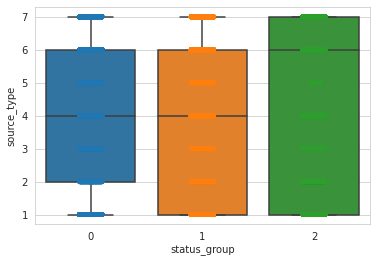

In [17]:
# Let's look at a boxplot of Status Group vs. Source Type
sns.set_style('whitegrid')
ax = sns.boxplot(x='status_group', y='source_type', data=subset_water)
ax = sns.stripplot(x='status_group', y='source_type', data=subset_water)

Zero = Non Functional

One = Functional

Two = Functional Needs Repair

In [20]:
# Let's take an additional subset from our data slice (subset_water)
subset_water_2 = subset_water[['district_code','gps_height','source_type','waterpoint_type','status_group']]
subset_water_2.head()




,district_code,gps_height,source_type,waterpoint_type,status_group
0,5,1390,1,1,1
1,2,1399,2,1,1
2,4,686,3,4,1
3,63,263,4,4,0
4,1,0,2,1,1


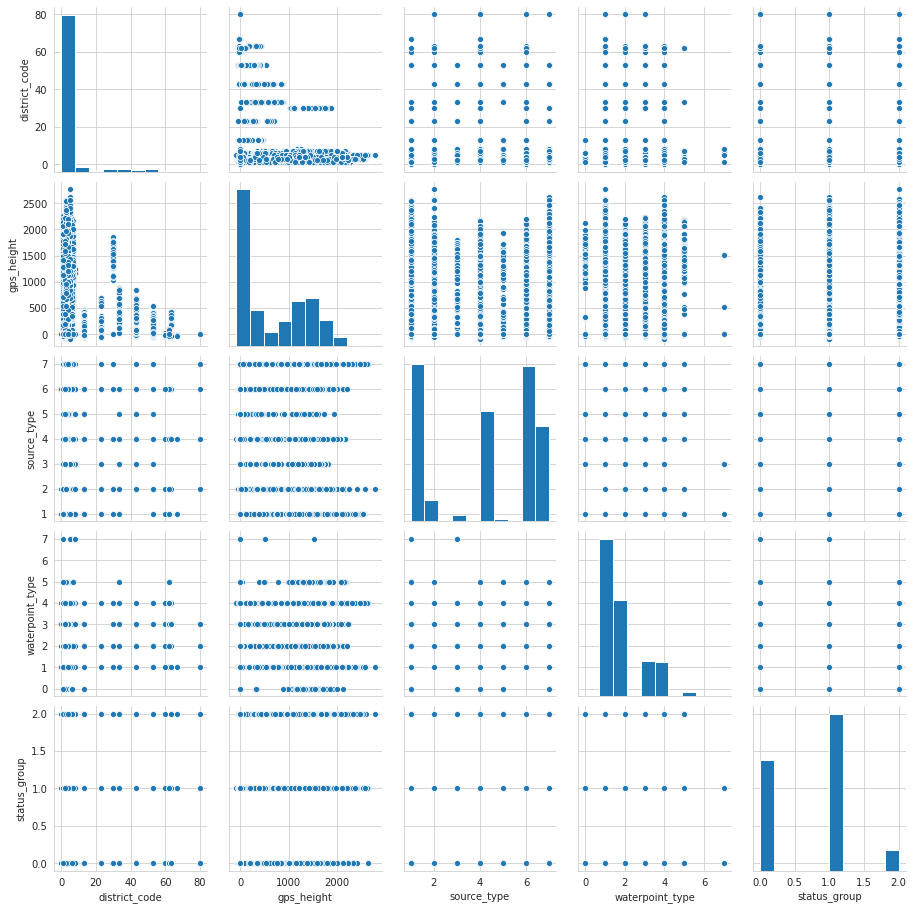

In [21]:
# Let's look at a Seaborn Pair's Plot of these features
sns.pairplot(subset_water_2)

In [22]:
# Spliting the data into Train and Test Sets and looking at the shape of the Train/Test Sets
X = subset_water.drop('status_group', axis=1)
y = subset_water['status_group']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
print('Training Set: ', X_train.shape, y_train.shape)
print('Testing Set: ', X_test.shape, y_test.shape)




Training Set:  (47520, 11) (47520,)
Testing Set:  (11880, 11) (11880,)


Accuarcy: 0.5973063973063973

              precision    recall  f1-score   support

           0       0.57      0.39      0.46      4565
           1       0.61      0.83      0.70      6452
           2       0.00      0.00      0.00       863

    accuracy                           0.60     11880
   macro avg       0.39      0.40      0.39     11880
weighted avg       0.55      0.60      0.56     11880


Average 5-Fold CV Score: 0.5972 , Standard Deviation: 0.0034


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


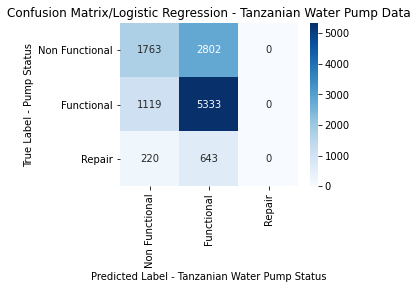

In [ ]:
# Let's try Logistic Regression
LR = LogisticRegression(C=0.00008, random_state=123)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuarcy:', metrics.accuracy_score(y_pred, y_test))

## 5-Fold Cross Validation
cv_scores = cross_val_score(LR, X, y, cv=5)

# Print the 5-Fold Cross Validation Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard Deviation: {}".format(round(np.std(cv_scores),4)))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt='d',
            xticklabels = ['Non Functional', 'Functional', 'Repair'],
            yticklabels = ['Non Functional', 'Functional', 'Repair'])

plt.ylabel('True Label - Pump Status')
plt.xlabel('Predicted Label - Tanzanian Water Pump Status')
plt.title("Confusion Matrix/Logistic Regression - Tanzanian Water Pump Data");


In [ ]:
# Let's see if we can get a Decision Tree Classification Model to run
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train, y_train)
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
## 5-Fold Cross Validation
cv_scores = cross_val_score(dtc, X, y, cv=5)


              precision    recall  f1-score   support

           0       0.57      0.39      0.46      4565
           1       0.61      0.83      0.70      6452
           2       0.00      0.00      0.00       863

    accuracy                           0.60     11880
   macro avg       0.39      0.40      0.39     11880
weighted avg       0.55      0.60      0.56     11880


Average 5-Fold CV Score: 0.5972 , Standard Devation: 0.0034


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


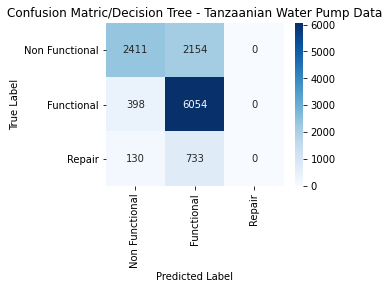

In [ ]:
# Let's print the 5-Fold Cross Validation Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}". format(round(np.mean(cv_scores),4)),
      ", Standard Devation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,dtc.predict(X_test))
sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt='d',
            xticklabels = ['Non Functional', 'Functional', 'Repair'],
            yticklabels = ['Non Functional', 'Functional', 'Repair'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matric/Decision Tree - Tanzaanian Water Pump Data");

In [ ]:
# Let's Predict with Accuracy Evaluation
yhat= dtc.predict(X_test)
print('Training Set Accuracy: ', metrics.accuracy_score(y_train, dtc.predict(X_train)))
print('Test Set Accuracy: ', metrics.accuracy_score(y_test, yhat))


Training Set Accuracy:  0.712037037037037
Test Set Accuracy:  0.7125420875420876


Ok, running a Decision Tree Classifier got us an 11.56 point jump in the accuracy score from 59.72% to 71.2% that is a good increase in the model's accuracy.

Next, Let's try an build a Random Forest Classifier, and then fold in with Grid Search/Cross Validation Model.

In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=7).fit(X_train, y_train)
yhatRF = rfc.predict(X_test)
print('Training Set Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Testing Set Accuracy: ', metrics.accuracy_score(y_test, yhatRF))


Training Set Accuracy:  0.7310185185185185
Testing Set Accuracy:  0.7274410774410774


The Accuracy went up to 73.13% on the Training Set, and 72.58% on the Testing Set.

In [ ]:
# RFC with Grid Search and Cross Validation
rfc_params = {'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'min_samples_split':[2,5,10,20]}

grid_rfc = GridSearchCV(RandomForestClassifier(),
                        rfc_params,
                        cv=5,
                        scoring='accuracy').fit(X_train, y_train)

yhatGS = grid_rfc.predict(X_test)

print('Training Set Accuracy: ', metrics.accuracy_score(y_train, grid_rfc.predict(X_train)))
print('Testing Set Accuracy: ', metrics.accuracy_score(y_test, yhatGS))


Training Set Accuracy:  0.8682449494949495
Testing Set Accuracy:  0.7767676767676768


Next, after executing the RFC Grid Search with Cross Validation we have increased the Training Set Accuracy to 86.82% and the Testing Set Accuracy to 77.67%. 


              precision    recall  f1-score   support

           0       0.57      0.39      0.46      4565
           1       0.61      0.83      0.70      6452
           2       0.00      0.00      0.00       863

    accuracy                           0.60     11880
   macro avg       0.39      0.40      0.39     11880
weighted avg       0.55      0.60      0.56     11880


Average 5-Fold CV Scores: 0.7292 , Standard Deviation: 0.0033


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


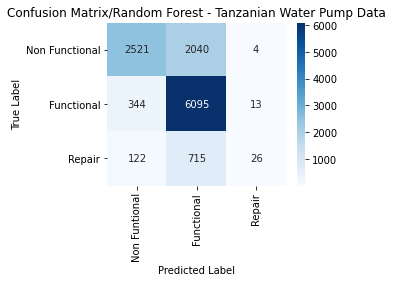

In [ ]:
## 5-Fold Cross-Validation
cv_scores = cross_val_score(rfc, X, y, cv=5)

# Print the 5-Fold Cross-Validation Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Scores: {}".format(round(np.mean(cv_scores),4)),
      ", Standard Deviation: {}".format(round(np.std(cv_scores),4)))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt='d',
            xticklabels = ['Non Funtional', 'Functional', 'Repair'],
            yticklabels = ['Non Functional', 'Functional', 'Repair'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matrix/Random Forest - Tanzanian Water Pump Data");

         

Now, we have three classification model runs completed, Logistic Regression, Decision Tree, and Random Forest. Let's see if we can compare our models graphically. 

Finally, let's run the test data through the model and make predictions.

In [ ]:
X2 = subset_water.drop(columns = ['id']).values
yhat2 = grid_rfc.predict(X2)
preds = pd.DataFrame(yhat2)
preds.head()

,0
0,0
1,0
2,0
3,1
4,0


In [ ]:
subset_water.shape, preds.shape

((59400, 12), (59400, 1))

So, we have two dataframes the next step is to combine them into one dataframe. We will use the "concat" syntax to complete this action and combine the "id" column with the "status_group" column. Afterward, the next step is to export the prediction to a CSV file.

In [ ]:
predict = pd.concat((subset_water['id'], preds), axis=1)
predict.columns=['id', 'status_group']
predict['status_group'].unique()

array([0, 1])

In [ ]:
predict.head()

,id,status_group
0,69572,0
1,8776,0
2,34310,0
3,67743,1
4,19728,0


In [ ]:
predict.tail()

,id,status_group
59395,60739,0
59396,27263,0
59397,37057,0
59398,31282,0
59399,26348,0


In [ ]:
# Let's export this to folder on my PC
predict.to_csv(r'C:\PANDAS\export_predict.csv', index=False, header=True)
print(predict)

          id  status_group
0      69572             0
1       8776             0
2      34310             0
3      67743             1
4      19728             0
...      ...           ...
59395  60739             0
59396  27263             0
59397  37057             0
59398  31282             0
59399  26348             0

[59400 rows x 2 columns]
